# Clustering 

## Installation of opencv 

In [19]:
!pip install opencv-python

# PART I : Kmeans clustering : original image 

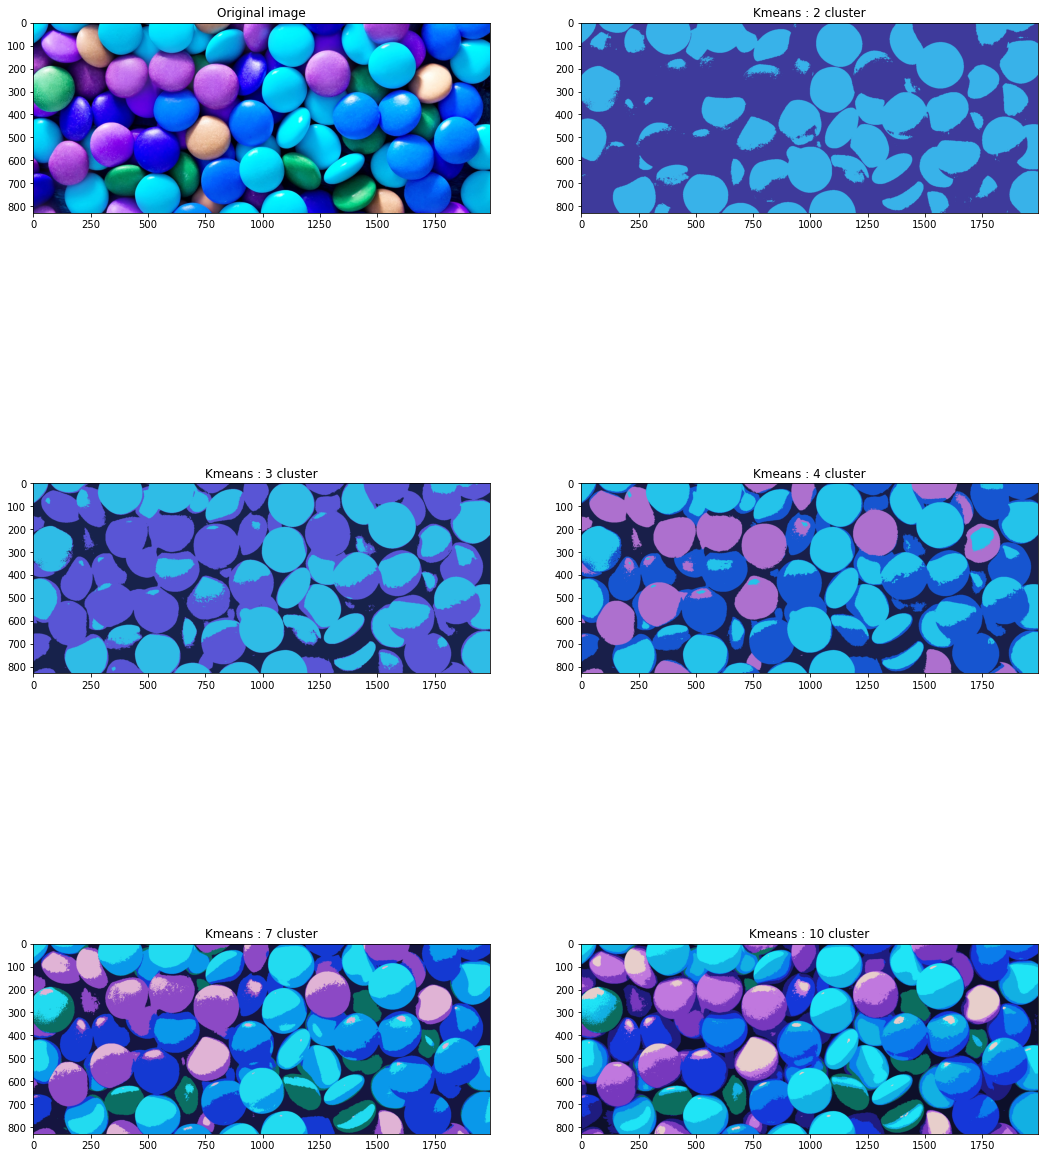

In [18]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('color.jpeg')

(h1, w1) = image.shape[:2]

image2 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image2 = image2.reshape((image2.shape[0] * image2.shape[1], 3))
################# kmeans : 2 cluster #########################################
clt2 = KMeans(n_clusters = 2)
labels2 = clt2.fit_predict(image2)
quant2 = clt2.cluster_centers_.astype("uint8")[labels2]

#reshape the feature vectors to images
quant2 = quant2.reshape((h1, w1, 3))
image2 = image2.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant2 = cv2.cvtColor(quant2, cv2.COLOR_LAB2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_LAB2BGR)

cv2.imwrite('color2.jpeg', quant2)
################# kmeans : 3 cluster #########################################

image3 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image3 = image3.reshape((image3.shape[0] * image3.shape[1], 3))

clt3 = KMeans(n_clusters = 3)
labels3 = clt3.fit_predict(image3)
quant3 = clt3.cluster_centers_.astype("uint8")[labels3]

#reshape the feature vectors to images
quant3 = quant3.reshape((h1, w1, 3))
image3 = image3.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant3 = cv2.cvtColor(quant3, cv2.COLOR_LAB2BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_LAB2BGR)

cv2.imwrite('color3.jpeg', quant3)

################# kmeans : 4 cluster #########################################
image4 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image4 = image4.reshape((image4.shape[0] * image4.shape[1], 3))

clt3 = KMeans(n_clusters = 4)
labels4 = clt3.fit_predict(image4)
quant4 = clt3.cluster_centers_.astype("uint8")[labels4]

#reshape the feature vectors to images
quant4 = quant4.reshape((h1, w1, 3))
image4 = image4.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant4 = cv2.cvtColor(quant4, cv2.COLOR_LAB2BGR)
image4 = cv2.cvtColor(image4, cv2.COLOR_LAB2BGR)

cv2.imwrite('color4.jpeg', quant4)

################# kmeans : 7 cluster #########################################
image7 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image7 = image7.reshape((image7.shape[0] * image7.shape[1], 3))

clt7 = KMeans(n_clusters = 7)
labels7 = clt7.fit_predict(image7)
quant7 = clt7.cluster_centers_.astype("uint8")[labels7]

#reshape the feature vectors to images
quant7 = quant7.reshape((h1, w1, 3))
image7 = image7.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant7 = cv2.cvtColor(quant7, cv2.COLOR_LAB2BGR)
image7 = cv2.cvtColor(image7, cv2.COLOR_LAB2BGR)

cv2.imwrite('color7.jpeg', quant7)

################# kmeans :  10 cluster #########################################
image10 = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image10 = image10.reshape((image10.shape[0] * image10.shape[1], 3))

clt10 = KMeans(n_clusters = 10)
labels10 = clt10.fit_predict(image10)
quant10 = clt10.cluster_centers_.astype("uint8")[labels10]

#reshape the feature vectors to images
quant10 = quant10.reshape((h1, w1, 3))
image10 = image10.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant10 = cv2.cvtColor(quant10, cv2.COLOR_LAB2BGR)
image10 = cv2.cvtColor(image10, cv2.COLOR_LAB2BGR)

cv2.imwrite('color10.jpeg', quant10)

################# display images  #########################################
fig, axs = plt.subplots(3, 2 , figsize=(18,24))

axs[0, 0].imshow(image)
axs[0, 0].set_title('Original image')
axs[0, 1].imshow(quant2)
axs[0, 1].set_title('Kmeans : 2 cluster')
axs[1, 0].imshow(quant3)
axs[1, 0].set_title('Kmeans : 3 cluster')
axs[1, 1].imshow(quant4)
axs[1, 1].set_title('Kmeans : 4 cluster')
axs[2, 0].imshow(quant7)
axs[2, 0].set_title('Kmeans : 7 cluster')
axs[2, 1].imshow(quant10)
axs[2, 1].set_title('Kmeans : 10 cluster')

cv2.imread('color.jpeg')
cv2.waitKey(0)
cv2.destroyAllWindows()


# PART II : Noise

## Test of different noises

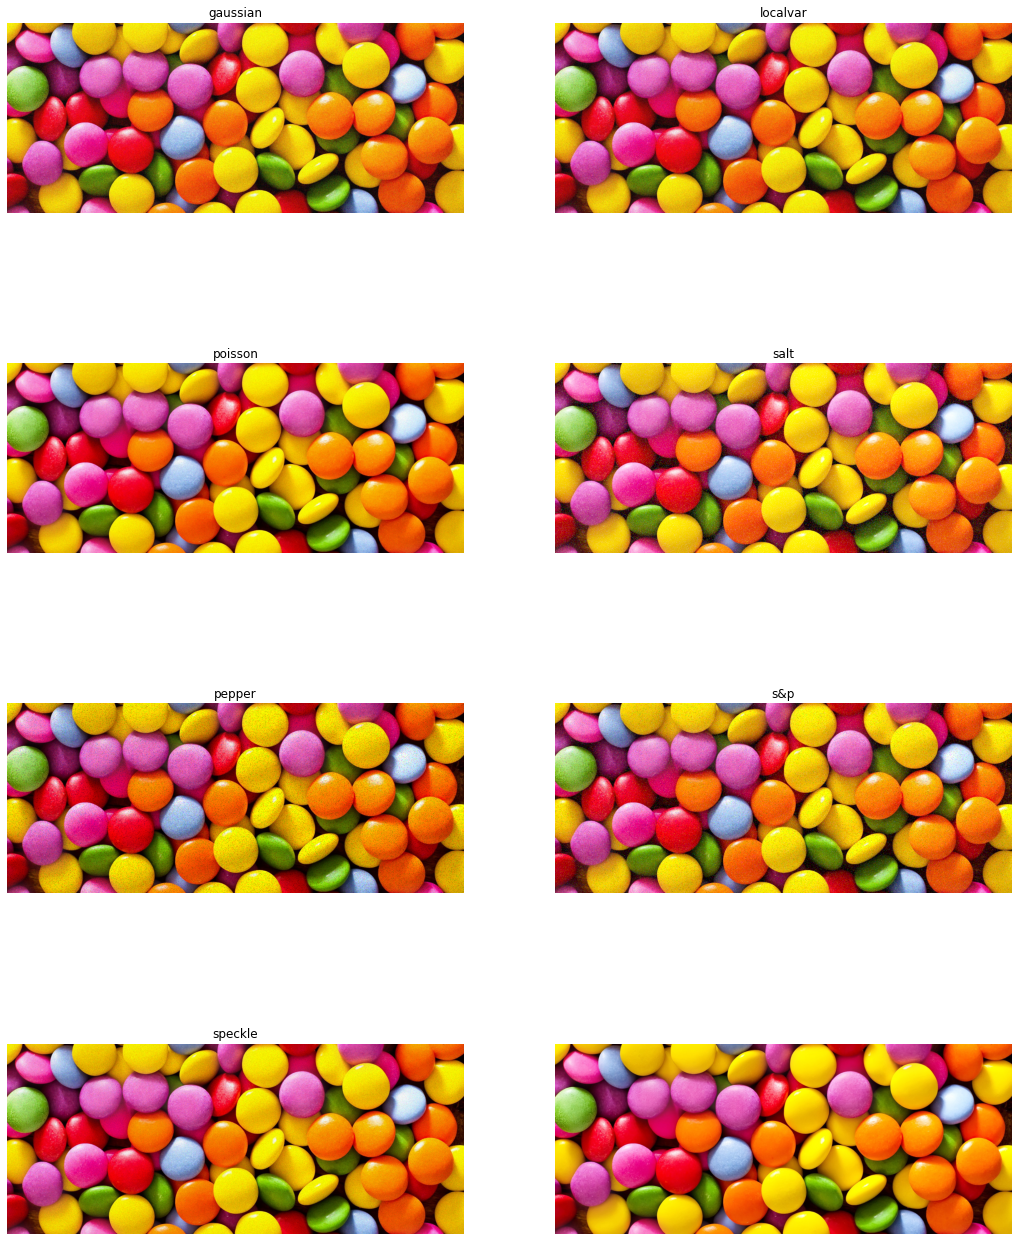

In [3]:
import skimage.io
img_path="color.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


## Add & Remove of salt noise

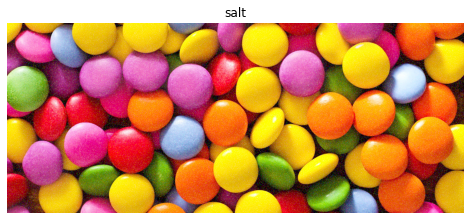

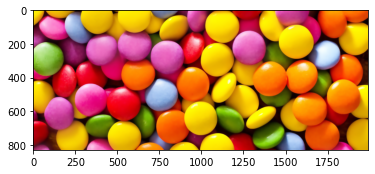

In [49]:
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

img_path="color.jpeg"
img = skimage.io.imread(img_path)/255.0

# add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.5)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "salt", r,c,4)
plt.show()

# remove of salt-and-pepper noise to the image.
denoised_image = denoise_tv_chambolle(img, weight=0.1, multichannel=True)
# Display the denoise image
plt.imshow(denoised_image)


# PART III : Compare images : denoised_image & original_image

In [54]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images

img1 = img
img2 = denoised_image

diff_rotated = compare_images(img1, img2, method='diff')


[]

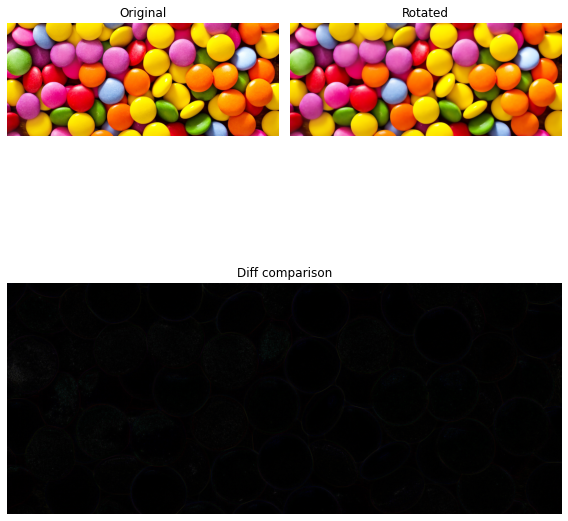

In [55]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Salt')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()